<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 5

## Help Yelp

---

In this project you will be investigating a small version of the [Yelp challenge dataset](https://www.yelp.com/dataset_challenge). You'll practice using classification algorithms, cross-validation, gridsearching – all that good stuff.



---

### The data

There are 5 individual .csv files that have the information, zipped into .7z format like with the SF data last project. The dataset is located in your datasets folder:

    DSI-SF-2/datasets/yelp_arizona_data.7z

The columns in each are:

    businesses_small_parsed.csv
        business_id: unique business identifier
        name: name of the business
        review_count: number of reviews per business
        city: city business resides in
        stars: average rating
        categories: categories the business falls into (can be one or multiple)
        latitude
        longitude
        neighborhoods: neighborhoods business belongs to
        variable: "property" of the business (a tag)
        value: True/False for the property
        
    reviews_small_nlp_parsed.csv
        user_id: unique user identifier
        review_id: unique review identifier
        votes.cool: how many thought the review was "cool"
        business_id: unique business id the review is for
        votes.funny: how many thought the review was funny
        stars: rating given
        date: date of review
        votes.useful: how many thought the review was useful
        ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review
        
    users_small_parsed.csv
        yelping_since: signup date
        compliments.plain: # of compliments "plain"
        review_count: # of reviews:
        compliments.cute: total # of compliments "cute"
        compliments.writer: # of compliments "writer"
        compliments.note: # of compliments "note" (not sure what this is)
        compliments.hot: # of compliments "hot" (?)
        compliments.cool: # of compliments "cool"
        compliments.profile: # of compliments "profile"
        average_stars: average rating
        compliments.more: # of compliments "more"
        elite: years considered "elite"
        name: user's name
        user_id: unique user id
        votes.cool: # of votes "cool"
        compliments.list: # of compliments "list"
        votes.funny: # of compliments "funny"
        compliments.photos: # of compliments "photos"
        compliments.funny: # of compliments "funny"
        votes.useful: # of votes "useful"
       
    checkins_small_parsed.csv
        business_id: unique business identifier
        variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
        value: # of checkins at that time
    
    tips_small_nlp_parsed.csv
        user_id: unique user identifier
        business_id: unique business identifier
        likes: likes that the tip has
        date: date of tip
        ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip

The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. I'm not sure whether the compliments or votes are _by_ the user or _for_ the user.

---

If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

    Phoenix
    Surprise
    Las Vegas
    Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because I thought the mix of them was funny:

    Airports
    Breakfast & Brunch
    Bubble Tea
    Burgers
    Bars
    Bakeries
    Breweries
    Cafes
    Candy Stores
    Comedy Clubs
    Courthouses
    Dance Clubs
    Fast Food
    Museums
    Tattoo
    Vape Shops
    Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

In [38]:
import pandas as pd
import numpy as np

In [39]:
df_biz = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/yelp_arizona_data/businesses_small_parsed.csv')
df_checkins = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/yelp_arizona_data/checkins_small_parsed.csv')

In [40]:
df_biz.sort_values('business_id').head()

,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value
104379,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Good For.dinner,False
93847,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],open,True
125117,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Has TV,False
57597,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Accepts Credit Cards,True
13050,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Outdoor Seating,True


In [41]:
df_biz_city = df_biz[['business_id', 'name', 'city', 'review_count', 'stars']]

In [42]:
df_test = df_biz_city.groupby(['business_id', 'name', 'city'])[['review_count','stars']].mean().reset_index()

In [43]:
df_biz.value.unique()

array(['False', 'True', '09:00', '11:00', '07:00', '09:30', '16:00',
       '10:00', '05:00', '17:00', '21:00', '10:30', '06:00', '06:30',
       '08:00', '00:00', '15:00', '15:30', '11:30', '04:00', '14:00',
       '01:00', '12:00', '05:30', '04:30', '07:30', '08:30', '18:00',
       '17:30', '22:00', '20:00', '14:30', '22:30', '13:00', '19:30',
       '16:30', '03:00', '19:00', '23:00', '20:30', '18:30', '05:45',
       '12:30', '00:30', '21:30', '23:30', 'full_bar', 'none',
       'beer_and_wine', 'no', 'yes_free', 'yes_corkage', '1.0', '2.0',
       '3.0', '4.0', '02:00', '01:30', '02:30', '13:30', '19:15', '01:20',
       '01:45', '03:30', '20:15', '23:59', '01:15', '11:45', '22:15',
       '15:45', '15:15', '21plus', '18plus', 'allages', 'free', 'paid',
       '16:45', '19:45', '03:45', 'very_loud', 'average', 'loud', 'quiet',
       'outdoor', 'yes', 'casual', 'dressy', 'formal'], dtype=object)

In [44]:
df_biz_wide = pd.pivot_table(df_biz,
                             values='value',
                             columns='variable',
                             index='business_id',
                             aggfunc=lambda x: x.values[0],
                             fill_value=np.nan
                             )

In [45]:
df_biz_wide.head()

variable,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
business_id,,,,,,,,,,,,,,,,,,,,,
--jFTZmywe7StuZ2hEjxyA,True,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
-0HGqwlfw3I8nkJyMHxAsQ,True,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
-0VK5Z1BfUHUYq4PoBYNLw,True,NaN,NaN,full_bar,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
-0bUDim5OGuv8R0Qqq6J4A,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
-1bOb2izeJBZjHC7NWxiPA,True,NaN,NaN,none,True,False,False,False,False,False,...,06:30,14:30,06:30,14:30,06:30,14:30,06:30,14:30,06:30,True


In [46]:
df_biz_wide.shape

(4132, 78)

In [47]:
df_biz_wide.columns.values

array(['attributes.Accepts Credit Cards', 'attributes.Accepts Insurance',
       'attributes.Ages Allowed', 'attributes.Alcohol',
       'attributes.Ambience.casual', 'attributes.Ambience.classy',
       'attributes.Ambience.divey', 'attributes.Ambience.hipster',
       'attributes.Ambience.intimate', 'attributes.Ambience.romantic',
       'attributes.Ambience.touristy', 'attributes.Ambience.trendy',
       'attributes.Ambience.upscale', 'attributes.Attire',
       'attributes.BYOB', 'attributes.BYOB/Corkage',
       'attributes.By Appointment Only', 'attributes.Caters',
       'attributes.Coat Check', 'attributes.Corkage',
       'attributes.Delivery', 'attributes.Dietary Restrictions.dairy-free',
       'attributes.Dietary Restrictions.gluten-free',
       'attributes.Dietary Restrictions.halal',
       'attributes.Dietary Restrictions.kosher',
       'attributes.Dietary Restrictions.soy-free',
       'attributes.Dietary Restrictions.vegan',
       'attributes.Dietary Restrictions.ve

In [48]:
df_biz_wide_final = df_biz_wide[['attributes.Accepts Credit Cards',
       'attributes.Ambience.casual', 'attributes.Ambience.classy',
       'attributes.Ambience.divey', 'attributes.Ambience.hipster',
       'attributes.Ambience.intimate', 'attributes.Ambience.romantic',
       'attributes.Ambience.touristy', 'attributes.Ambience.trendy',
       'attributes.Ambience.upscale', 'attributes.Good For Dancing', 'attributes.Good For Groups',
       'attributes.Good For.breakfast', 'attributes.Good For.brunch',
       'attributes.Good For.dessert', 'attributes.Good For.dinner',
       'attributes.Good For.latenight', 'attributes.Good For.lunch',
       'attributes.Good for Kids', 'attributes.Happy Hour',
       'attributes.Has TV', 'attributes.Music.background_music',
       'attributes.Music.dj', 'attributes.Music.jukebox',
       'attributes.Music.karaoke', 'attributes.Music.live',
       'attributes.Music.video',
       'attributes.Price Range', 'attributes.Smoking',
       'attributes.Take-out', 'attributes.Takes Reservations',
       'attributes.Waiter Service']]
df_biz_wide_final.head()

variable,attributes.Accepts Credit Cards,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,attributes.Ambience.trendy,attributes.Ambience.upscale,...,attributes.Music.dj,attributes.Music.jukebox,attributes.Music.karaoke,attributes.Music.live,attributes.Music.video,attributes.Price Range,attributes.Smoking,attributes.Take-out,attributes.Takes Reservations,attributes.Waiter Service
business_id,,,,,,,,,,,,,,,,,,,,,
--jFTZmywe7StuZ2hEjxyA,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,True,False,NaN
-0HGqwlfw3I8nkJyMHxAsQ,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,True,False,False
-0VK5Z1BfUHUYq4PoBYNLw,True,True,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,False,NaN,2.0,yes,NaN,NaN,NaN
-0bUDim5OGuv8R0Qqq6J4A,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,True,False,True
-1bOb2izeJBZjHC7NWxiPA,True,True,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,True,False,True


In [49]:
df_biz_wide_final.isnull().sum()

variable
attributes.Accepts Credit Cards       236
attributes.Ambience.casual           1259
attributes.Ambience.classy           1259
attributes.Ambience.divey            1268
attributes.Ambience.hipster          1261
attributes.Ambience.intimate         1259
attributes.Ambience.romantic         1259
attributes.Ambience.touristy         1259
attributes.Ambience.trendy           1259
attributes.Ambience.upscale          1266
attributes.Good For Dancing          2855
attributes.Good For Groups            770
attributes.Good For.breakfast        1624
attributes.Good For.brunch           1629
attributes.Good For.dessert          1630
attributes.Good For.dinner           1625
attributes.Good For.latenight        1625
attributes.Good For.lunch            1625
attributes.Good for Kids             1223
attributes.Happy Hour                2811
attributes.Has TV                    1048
attributes.Music.background_music    3726
attributes.Music.dj                  3080
attributes.Music.jukebox 

In [50]:
df_biz_wide_final.reset_index().head()

variable,business_id,attributes.Accepts Credit Cards,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,attributes.Ambience.trendy,...,attributes.Music.dj,attributes.Music.jukebox,attributes.Music.karaoke,attributes.Music.live,attributes.Music.video,attributes.Price Range,attributes.Smoking,attributes.Take-out,attributes.Takes Reservations,attributes.Waiter Service
0,--jFTZmywe7StuZ2hEjxyA,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,True,False,NaN
1,-0HGqwlfw3I8nkJyMHxAsQ,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,True,False,False
2,-0VK5Z1BfUHUYq4PoBYNLw,True,True,False,False,False,False,False,False,False,...,NaN,NaN,NaN,False,NaN,2.0,yes,NaN,NaN,NaN
3,-0bUDim5OGuv8R0Qqq6J4A,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,True,False,True
4,-1bOb2izeJBZjHC7NWxiPA,True,True,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,True,False,True


In [51]:
df_biz_wide_final_1 = df_biz_wide_final.reset_index()
df_biz_wide_final_1.shape

(4132, 33)

In [52]:
df_biz_wide_final_1.head(10)
daves_df = df_biz_wide_final_1

In [53]:
## ALternate clean column method
daves_df.columns = [col.replace(".", '').replace('attribute', '').replace(' ', '').lower() for col in df_biz_wide_final_1.columns]



In [54]:
df_1 = df_biz_wide_final_1.merge(df_test, on='business_id',how='left')

df_1.head()

,business_id,sacceptscreditcards,sambiencecasual,sambienceclassy,sambiencedivey,sambiencehipster,sambienceintimate,sambienceromantic,sambiencetouristy,sambiencetrendy,...,smusicvideo,spricerange,ssmoking,stake-out,stakesreservations,swaiterservice,name,city,review_count,stars
0,--jFTZmywe7StuZ2hEjxyA,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,True,False,NaN,Subway,Las Vegas,7,3.5
1,-0HGqwlfw3I8nkJyMHxAsQ,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,True,False,False,McDonald's,Phoenix,9,3.0
2,-0VK5Z1BfUHUYq4PoBYNLw,True,True,False,False,False,False,False,False,False,...,NaN,2.0,yes,NaN,NaN,NaN,T Spot,Las Vegas,5,3.5
3,-0bUDim5OGuv8R0Qqq6J4A,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,True,False,True,IHOP,Phoenix,8,2.0
4,-1bOb2izeJBZjHC7NWxiPA,True,True,False,False,False,False,False,False,False,...,NaN,1.0,NaN,True,False,True,First Watch,Phoenix,120,4.0


In [55]:
df_1.replace('True', 1, inplace=True)
df_1.replace('False', 0, inplace=True)
df_1.replace('Yes', 1, inplace=True)
df_1.replace('No', 0, inplace=True)

In [56]:
df_1.replace('no', 0, inplace=True)

In [57]:
df_1.replace('yes', 1, inplace=True)

In [58]:
df_1.replace('outdoor', 1, inplace=True)

In [59]:
df_1

,business_id,sacceptscreditcards,sambiencecasual,sambienceclassy,sambiencedivey,sambiencehipster,sambienceintimate,sambienceromantic,sambiencetouristy,sambiencetrendy,...,smusicvideo,spricerange,ssmoking,stake-out,stakesreservations,swaiterservice,name,city,review_count,stars
0,--jFTZmywe7StuZ2hEjxyA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,0.0,NaN,Subway,Las Vegas,7,3.5
1,-0HGqwlfw3I8nkJyMHxAsQ,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,0.0,0.0,McDonald's,Phoenix,9,3.0
2,-0VK5Z1BfUHUYq4PoBYNLw,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,2.0,1.0,NaN,NaN,NaN,T Spot,Las Vegas,5,3.5
3,-0bUDim5OGuv8R0Qqq6J4A,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,0.0,1.0,IHOP,Phoenix,8,2.0
4,-1bOb2izeJBZjHC7NWxiPA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,NaN,1.0,0.0,1.0,First Watch,Phoenix,120,4.0
5,-2_O3_WKgO5In5XO5extNQ,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,Balkan Bakery,Phoenix,23,5.0
6,-2k6VTGx1M93hscEdhx37A,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,Trend Vape,Phoenix,18,4.5
7,-3xbryp44xhpN4BohxXDdQ,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,3.0,0.0,1.0,1.0,1.0,The Keg Steakhouse + Bar,Phoenix,213,4.0
8,-4mNZfAXMd2mxEsD2YRcaQ,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,NaN,1.0,0.0,0.0,McDonald's,Las Vegas,13,3.0
9,-584fn2GxYe9sLsgN2WeQA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,NaN,1.0,0.0,1.0,Great Links Brewhouse & Grill,Las Vegas,245,4.0


In [60]:
df_1.columns.values

array(['business_id', 'sacceptscreditcards', 'sambiencecasual',
       'sambienceclassy', 'sambiencedivey', 'sambiencehipster',
       'sambienceintimate', 'sambienceromantic', 'sambiencetouristy',
       'sambiencetrendy', 'sambienceupscale', 'sgoodfordancing',
       'sgoodforgroups', 'sgoodforbreakfast', 'sgoodforbrunch',
       'sgoodfordessert', 'sgoodfordinner', 'sgoodforlatenight',
       'sgoodforlunch', 'sgoodforkids', 'shappyhour', 'shastv',
       'smusicbackground_music', 'smusicdj', 'smusicjukebox',
       'smusickaraoke', 'smusiclive', 'smusicvideo', 'spricerange',
       'ssmoking', 'stake-out', 'stakesreservations', 'swaiterservice',
       'name', 'city', 'review_count', 'stars'], dtype=object)

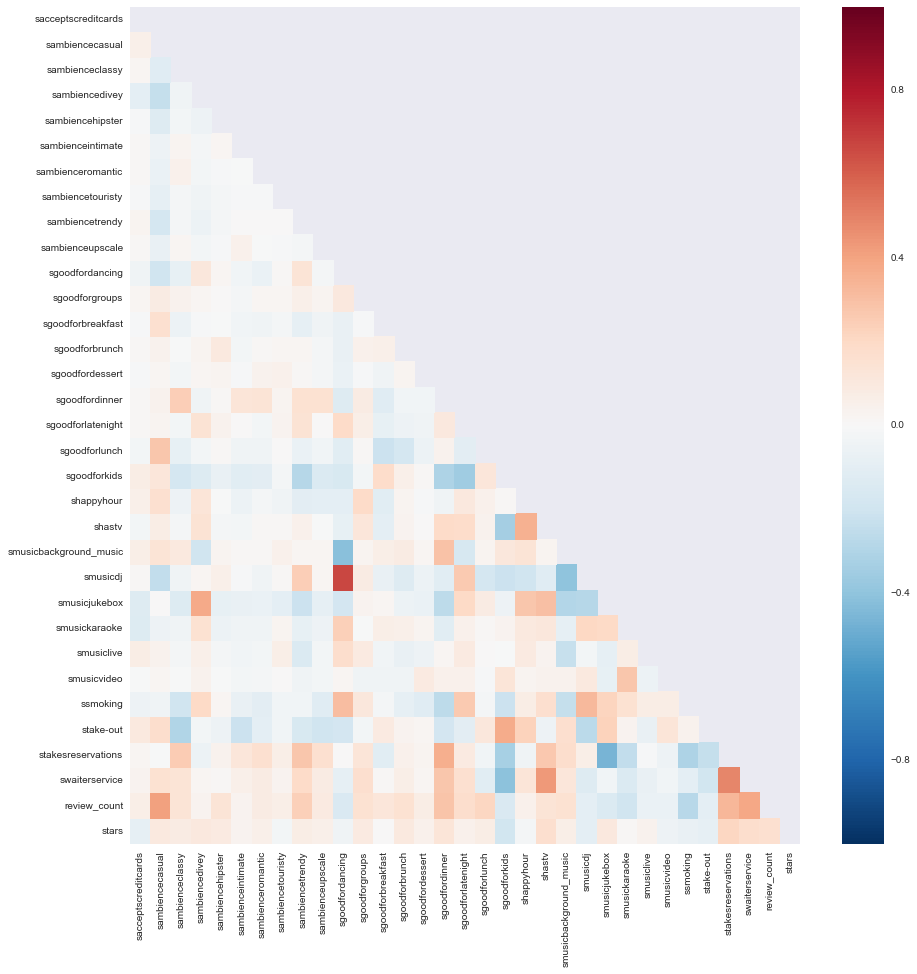

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df_1.corr(method='spearman')

%matplotlib inline

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(15,15))
ax = fig.gca()

ax = sns.heatmap(correlations, mask=mask)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

In [62]:
df_1.fillna(0, inplace=True)

In [63]:
def city_binary(x):
    if 'Las Vegas' in x:
        return 1
    else:
        return 0

df_1['city_binary'] = df_1['city'].apply(city_binary)
df_1.head()

,business_id,sacceptscreditcards,sambiencecasual,sambienceclassy,sambiencedivey,sambiencehipster,sambienceintimate,sambienceromantic,sambiencetouristy,sambiencetrendy,...,spricerange,ssmoking,stake-out,stakesreservations,swaiterservice,name,city,review_count,stars,city_binary
0,--jFTZmywe7StuZ2hEjxyA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,Subway,Las Vegas,7,3.5,1
1,-0HGqwlfw3I8nkJyMHxAsQ,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,McDonald's,Phoenix,9,3.0,0
2,-0VK5Z1BfUHUYq4PoBYNLw,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,T Spot,Las Vegas,5,3.5,1
3,-0bUDim5OGuv8R0Qqq6J4A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,IHOP,Phoenix,8,2.0,0
4,-1bOb2izeJBZjHC7NWxiPA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,First Watch,Phoenix,120,4.0,0


In [64]:
df_1.columns.values

array(['business_id', 'sacceptscreditcards', 'sambiencecasual',
       'sambienceclassy', 'sambiencedivey', 'sambiencehipster',
       'sambienceintimate', 'sambienceromantic', 'sambiencetouristy',
       'sambiencetrendy', 'sambienceupscale', 'sgoodfordancing',
       'sgoodforgroups', 'sgoodforbreakfast', 'sgoodforbrunch',
       'sgoodfordessert', 'sgoodfordinner', 'sgoodforlatenight',
       'sgoodforlunch', 'sgoodforkids', 'shappyhour', 'shastv',
       'smusicbackground_music', 'smusicdj', 'smusicjukebox',
       'smusickaraoke', 'smusiclive', 'smusicvideo', 'spricerange',
       'ssmoking', 'stake-out', 'stakesreservations', 'swaiterservice',
       'name', 'city', 'review_count', 'stars', 'city_binary'], dtype=object)

In [65]:
df_1.columns = [col.replace(".", '').replace('attribute', '').replace(' ', '').replace('-','').lower() for col in df_1.columns]
df_1

,business_id,sacceptscreditcards,sambiencecasual,sambienceclassy,sambiencedivey,sambiencehipster,sambienceintimate,sambienceromantic,sambiencetouristy,sambiencetrendy,...,spricerange,ssmoking,stakeout,stakesreservations,swaiterservice,name,city,review_count,stars,city_binary
0,--jFTZmywe7StuZ2hEjxyA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,Subway,Las Vegas,7,3.5,1
1,-0HGqwlfw3I8nkJyMHxAsQ,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,McDonald's,Phoenix,9,3.0,0
2,-0VK5Z1BfUHUYq4PoBYNLw,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,T Spot,Las Vegas,5,3.5,1
3,-0bUDim5OGuv8R0Qqq6J4A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,IHOP,Phoenix,8,2.0,0
4,-1bOb2izeJBZjHC7NWxiPA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,First Watch,Phoenix,120,4.0,0
5,-2_O3_WKgO5In5XO5extNQ,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Balkan Bakery,Phoenix,23,5.0,0
6,-2k6VTGx1M93hscEdhx37A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Trend Vape,Phoenix,18,4.5,0
7,-3xbryp44xhpN4BohxXDdQ,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,1.0,1.0,The Keg Steakhouse + Bar,Phoenix,213,4.0,0
8,-4mNZfAXMd2mxEsD2YRcaQ,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,McDonald's,Las Vegas,13,3.0,1
9,-584fn2GxYe9sLsgN2WeQA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,Great Links Brewhouse & Grill,Las Vegas,245,4.0,1


In [66]:
df_1.columns.values

array(['business_id', 'sacceptscreditcards', 'sambiencecasual',
       'sambienceclassy', 'sambiencedivey', 'sambiencehipster',
       'sambienceintimate', 'sambienceromantic', 'sambiencetouristy',
       'sambiencetrendy', 'sambienceupscale', 'sgoodfordancing',
       'sgoodforgroups', 'sgoodforbreakfast', 'sgoodforbrunch',
       'sgoodfordessert', 'sgoodfordinner', 'sgoodforlatenight',
       'sgoodforlunch', 'sgoodforkids', 'shappyhour', 'shastv',
       'smusicbackground_music', 'smusicdj', 'smusicjukebox',
       'smusickaraoke', 'smusiclive', 'smusicvideo', 'spricerange',
       'ssmoking', 'stakeout', 'stakesreservations', 'swaiterservice',
       'name', 'city', 'review_count', 'stars', 'city_binary'], dtype=object)

In [67]:
daves_df.columns

Index([u'business_id', u'sacceptscreditcards', u'sambiencecasual',
       u'sambienceclassy', u'sambiencedivey', u'sambiencehipster',
       u'sambienceintimate', u'sambienceromantic', u'sambiencetouristy',
       u'sambiencetrendy', u'sambienceupscale', u'sgoodfordancing',
       u'sgoodforgroups', u'sgoodforbreakfast', u'sgoodforbrunch',
       u'sgoodfordessert', u'sgoodfordinner', u'sgoodforlatenight',
       u'sgoodforlunch', u'sgoodforkids', u'shappyhour', u'shastv',
       u'smusicbackground_music', u'smusicdj', u'smusicjukebox',
       u'smusickaraoke', u'smusiclive', u'smusicvideo', u'spricerange',
       u'ssmoking', u'stake-out', u'stakesreservations', u'swaiterservice'],
      dtype='object')

In [68]:
import patsy

formulas = 'city_binary ~ business_id + sacceptscreditcards + sambiencecasual + sambienceclassy + sambiencedivey + sambiencehipster + sambienceintimate + sambienceromantic + sambiencetouristy + sambiencetrendy + sambienceupscale + sgoodfordancing + sgoodforgroups + sgoodforbreakfast + sgoodforbrunch + sgoodfordessert + sgoodfordinner + sgoodforlatenight + sgoodforlunch + sgoodforkids + shappyhour + shastv + smusicbackground_music + smusicdj + smusicjukebox + smusickaraoke + smusiclive + smusicvideo + spricerange + ssmoking + stakeout + stakesreservations + swaiterservice + review_count + stars - 1' 
y, X = patsy.dmatrices(formulas, data=df_1, return_type='dataframe')

In [69]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

search_parameters = {
    'penalty': ['l1','l2'],
    'fit_intercept': [True,False],
    'C': np.logspace(1e-4,2,100)
}

logreg = LogisticRegression()

estimator = GridSearchCV(logreg, search_parameters, cv=5)

results = estimator.fit(X, np.ravel(y))

print 'score: ', results.best_score_
print '\n params: ', results.best_params_
print '\n estimator: ', results.best_estimator_

score:  0.634075508228

 params:  {'penalty': 'l1', 'C': 1.5202292730365132, 'fit_intercept': True}

 estimator:  LogisticRegression(C=1.5202292730365132, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


trainX shape:  (2892, 4169) 
testX shape: (1240, 4169)
trainY shape:  (2892, 1) 
testY shape: (1240, 1)
Model Score:  0.620161290323


/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


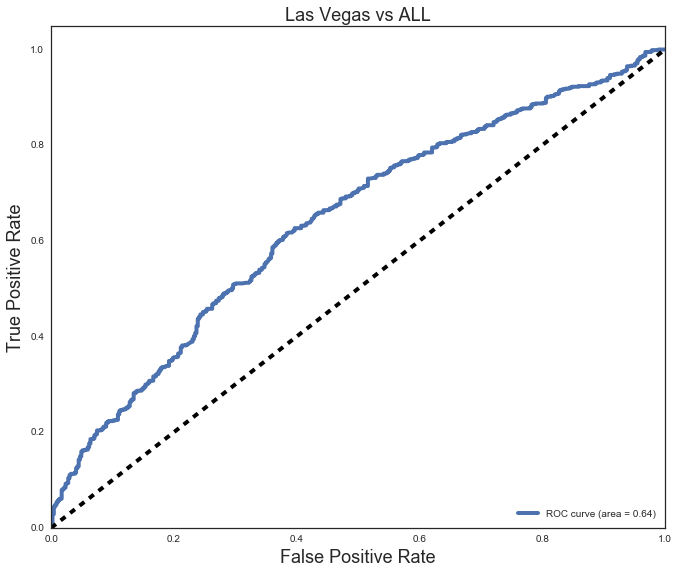

In [70]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, target, train_size=0.7, stratify=target)
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression(penalty='l1', C=6.735059148708765, fit_intercept=True)
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('%s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X, y, title='Las Vegas vs ALL')

In [71]:
import patsy

formulas = 'city_binary ~ sambiencecasual + sambienceclassy + sambiencedivey + sambiencehipster + sambienceintimate + sambienceromantic + sambiencetouristy + sambiencetrendy + sambienceupscale - 1' 
y, X = patsy.dmatrices(formulas, data=df_1, return_type='dataframe')

In [72]:
y = np.ravel(y)

In [73]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

search_parameters = {
    'penalty': ['l1','l2'],
    'fit_intercept': [True,False],
    'C': np.logspace(1e-4,2,100)
}

logreg = LogisticRegression()

estimator = GridSearchCV(logreg, search_parameters, cv=5)

results = estimator.fit(X, y)

print 'score: ', results.best_score_
print '\n params: ', results.best_params_
print '\n estimator: ', results.best_estimator_

score:  0.622700871249

 params:  {'penalty': 'l1', 'C': 1.0002302850208247, 'fit_intercept': True}

 estimator:  LogisticRegression(C=1.0002302850208247, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


trainX shape:  (2892, 9) 
testX shape: (1240, 9)
trainY shape:  (2892,) 
testY shape: (1240,)
Model Score:  0.622580645161


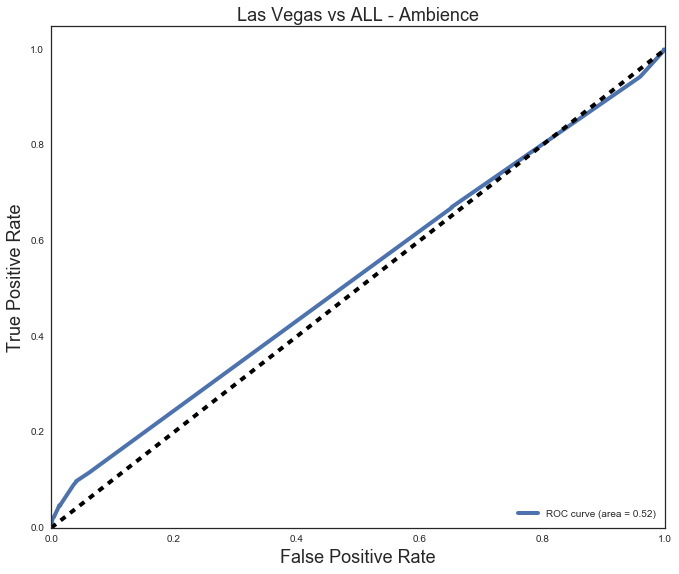

In [74]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, target, train_size=0.7, stratify=target)
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression(penalty='l1', C=6.735059148708765, fit_intercept=True)
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('%s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X, y, title='Las Vegas vs ALL - Ambience')

In [75]:
import patsy

formulas = 'city_binary ~ smusicbackground_music + smusicdj + smusicjukebox + smusickaraoke + smusiclive + smusicvideo - 1' 
y3, X3 = patsy.dmatrices(formulas, data=df_1, return_type='dataframe')

In [76]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

search_parameters = {
    'penalty': ['l1','l2'],
    'fit_intercept': [True,False],
    'C': np.logspace(1e-4,2,100)
}

logreg = LogisticRegression()

estimator = GridSearchCV(logreg, search_parameters, cv=5)

results = estimator.fit(X3, np.ravel(y3))

print 'score: ', results.best_score_
print '\n params: ', results.best_params_
print '\n estimator: ', results.best_estimator_

score:  0.618828654405

 params:  {'penalty': 'l1', 'C': 1.0002302850208247, 'fit_intercept': True}

 estimator:  LogisticRegression(C=1.0002302850208247, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


trainX shape:  (2892, 6) 
testX shape: (1240, 6)
trainY shape:  (2892, 1) 
testY shape: (1240, 1)
Model Score:  0.621774193548


/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


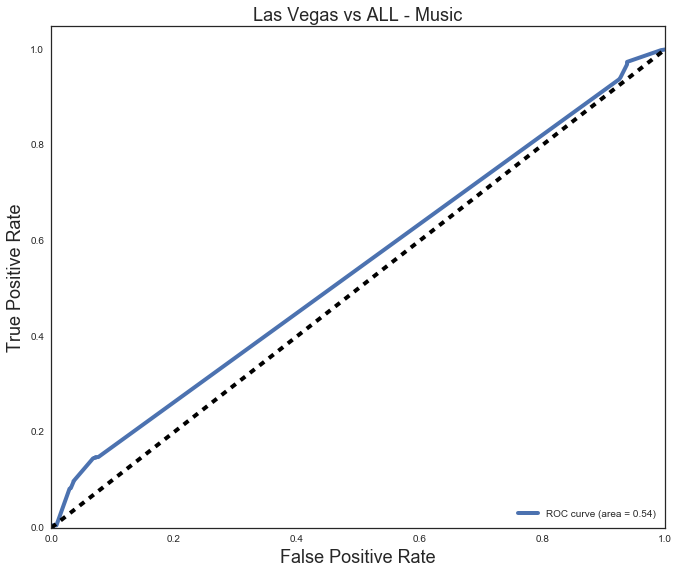

In [77]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, target, train_size=0.7, stratify=target)
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression(penalty='l1', C=1.0002302850208247, fit_intercept=True)
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('%s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X3, y3, title='Las Vegas vs ALL - Music')

In [78]:
import patsy

formulas = 'city_binary ~ sgoodfordancing + sgoodforgroups + sgoodforbreakfast + sgoodforbrunch + sgoodfordessert + sgoodfordinner + sgoodforlatenight + sgoodforlunch + sgoodforkids + shappyhour + shastv - 1' 
y2, X2 = patsy.dmatrices(formulas, data=df_1, return_type='dataframe')

In [79]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

search_parameters = {
    'penalty': ['l1','l2'],
    'fit_intercept': [True,False],
    'C': np.logspace(1e-4,2,100)
}

logreg = LogisticRegression()

estimator = GridSearchCV(logreg, search_parameters, cv=5)

results = estimator.fit(X2, np.ravel(y2))

print 'score: ', results.best_score_
print '\n params: ', results.best_params_
print '\n estimator: ', results.best_estimator_

score:  0.626815101646

 params:  {'penalty': 'l2', 'C': 1.0002302850208247, 'fit_intercept': True}

 estimator:  LogisticRegression(C=1.0002302850208247, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


trainX shape:  (2892, 11) 
testX shape: (1240, 11)
trainY shape:  (2892, 1) 
testY shape: (1240, 1)
Model Score:  0.615322580645


/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


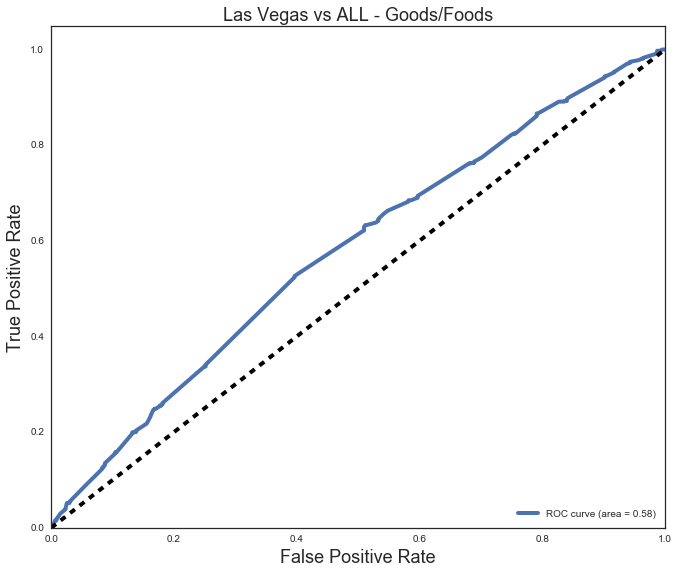

In [80]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, target, train_size=0.7, stratify=target)
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression(penalty='l2', C=1.0002302850208247, fit_intercept=True)
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('%s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X2, y2, title='Las Vegas vs ALL - Goods/Foods')

In [81]:
import patsy

formulas = 'city_binary ~ business_id + sacceptscreditcards + spricerange + ssmoking + stakeout + stakesreservations + swaiterservice + review_count + stars - 1' 
y4, X4 = patsy.dmatrices(formulas, data=df_1, return_type='dataframe')

In [82]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

search_parameters = {
    'penalty': ['l1','l2'],
    'fit_intercept': [True,False],
    'C': np.logspace(1e-4,2,100)
}

logreg = LogisticRegression()

estimator = GridSearchCV(logreg, search_parameters, cv=5)

results = estimator.fit(X4, np.ravel(y4))

print 'score: ', results.best_score_
print '\n params: ', results.best_params_
print '\n estimator: ', results.best_estimator_

score:  0.62366892546

 params:  {'penalty': 'l1', 'C': 1.9182894636841903, 'fit_intercept': True}

 estimator:  LogisticRegression(C=1.9182894636841903, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


trainX shape:  (2892, 4143) 
testX shape: (1240, 4143)
trainY shape:  (2892, 1) 
testY shape: (1240, 1)
Model Score:  0.621774193548


/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


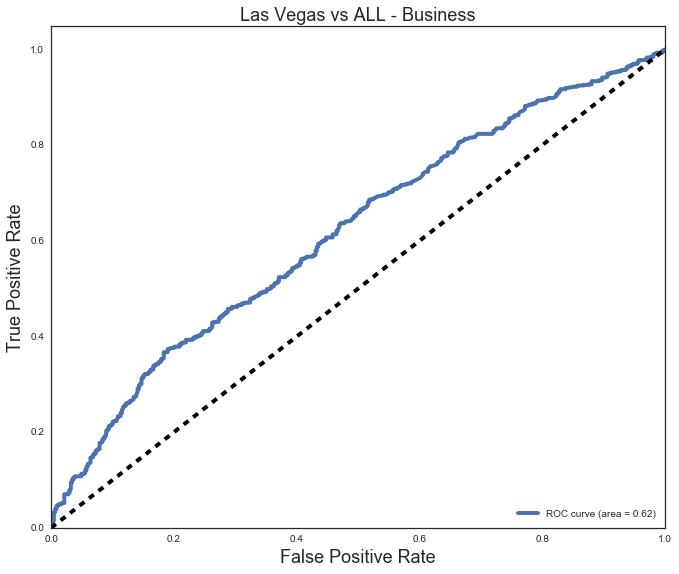

In [83]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, target, train_size=0.7, stratify=target)
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression(penalty='l1', C=6.735059148708765, fit_intercept=True)
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('%s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X4, y4, title='Las Vegas vs ALL - Business')

In [84]:
y = df_1['city_binary'].values

In [85]:
from sklearn.linear_model import LogisticRegression

trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.7, stratify=y)
print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape

logreg = LogisticRegression(penalty='l1', C=6.735059148708765, fit_intercept=True)

model = logreg.fit(trainX, trainY)

probabilities = model.predict_proba(testX)

score = model.score(testX, testY)
print 'Model Score: ', score

trainX shape:  (2892, 9) 
testX shape: (1240, 9)
trainY shape:  (2892,) 
testY shape: (1240,)
Model Score:  0.620967741935


In [86]:
hi = pd.DataFrame(zip(X, model.coef_[0]))
hi.iloc[-26:,:]

,0,1
0,sambiencecasual,-0.075655
1,sambienceclassy,1.258545
2,sambiencedivey,0.103107
3,sambiencehipster,-0.371803
4,sambienceintimate,0.565158
5,sambienceromantic,-1.377130
6,sambiencetouristy,2.924657
7,sambiencetrendy,0.352746
8,sambienceupscale,1.074576


In [87]:
import patsy

formulas = 'city_binary ~ sambiencetouristy + sgoodforgroups + sgoodforlatenight - 1' 
y_best, X_best = patsy.dmatrices(formulas, data=df_1, return_type='dataframe')

In [88]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

search_parameters = {
    'penalty': ['l1','l2'],
    'fit_intercept': [True,False],
    'C': np.logspace(1e-4,2,100)
}

logreg = LogisticRegression()

estimator = GridSearchCV(logreg, search_parameters, cv=5)

results = estimator.fit(X_best, np.ravel(y_best))

print 'score: ', results.best_score_
print '\n params: ', results.best_params_
print '\n estimator: ', results.best_estimator_

score:  0.621974830591

 params:  {'penalty': 'l1', 'C': 1.0002302850208247, 'fit_intercept': True}

 estimator:  LogisticRegression(C=1.0002302850208247, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


trainX shape:  (2892, 3) 
testX shape: (1240, 3)
trainY shape:  (2892, 1) 
testY shape: (1240, 1)
Model Score:  0.621774193548


/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


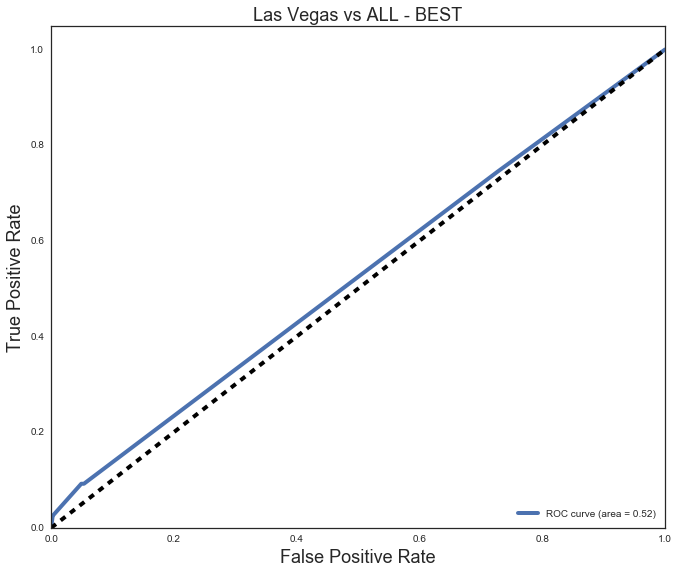

In [89]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, target, train_size=0.7, stratify=target)
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression(penalty='l1', C=1.0002302850208247, fit_intercept=True)
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('%s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X_best, y_best, title='Las Vegas vs ALL - BEST')

# Conclusion

The best ROC curve area I got was having all the predictors I used to predict the target, which was an area of 0.64. Surprisingly, I picked out the best predictor coefficients, but ended up with a much lower ROC curve area to the point that guessing would be better. It seems that my decision on strictly categorizing each column into 0s and 1s may have cancelled each other out, causing in a lower ROC curve area. So overall, my conclusion is that businesses on Yelp! in Las Vegas have a higher probability of being affected by ambience, music, goods and foods and business decisions.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [90]:
import pandas as pd
import numpy as np

df_review = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/yelp_arizona_data/reviews_small_nlp_parsed.csv')
df_tips = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/yelp_arizona_data/tips_small_nlp_parsed.csv')

In [91]:
df_review.head()

,user_id,review_id,votes.cool,business_id,votes.funny,stars,date,votes.useful,10 minutes,15 minutes,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,o_LCYay4uo5N4eq3U5pbrQ,biEOCicjWlibF26pNLvhcw,0,EmzaQR5hQlF0WIl24NxAZA,0,3,2007-09-14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sEWeeq41k4ohBz4jS_iGRw,tOhOHUAS7XJch7a_HW5Csw,3,EmzaQR5hQlF0WIl24NxAZA,12,2,2008-04-21,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1AqEqmmVHgYCuzcMrF4h2g,2aGafu-x7onydGoDgDfeQQ,0,EmzaQR5hQlF0WIl24NxAZA,2,2,2009-11-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pv82zTlB5Txsu2Pusu__FA,CY4SWiYcUZTWS_T_cGaGPA,4,EmzaQR5hQlF0WIl24NxAZA,9,2,2010-08-16,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,jlr3OBS1_Y3Lqa-H3-FR1g,VCKytaG-_YkxmQosH4E0jw,0,EmzaQR5hQlF0WIl24NxAZA,1,4,2010-12-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df_review_want = df_review[['business_id','stars']]

In [93]:
df_tips.head()

,user_id,business_id,likes,date,24 hours,amazing food,animal style,awesome food,awesome place,awesome service,...,service good,service great,slow service,staff friendly,staff great,steak eggs,super friendly,sweet potato,velvet pancakes,worth wait
0,trdsekNRD-gIs50EBrScwA,EmzaQR5hQlF0WIl24NxAZA,0,2012-02-27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,liIQCDzDTnvXc7X8twBIjg,EmzaQR5hQlF0WIl24NxAZA,0,2013-04-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,iW1ltQqq4GWAErobLiOv9w,EmzaQR5hQlF0WIl24NxAZA,0,2013-08-18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,wiBTgZNmDKHDgeuKSxIMjQ,SiwN7f0N4bs4ZtPc4yPgiA,0,2011-02-11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,wiBTgZNmDKHDgeuKSxIMjQ,SiwN7f0N4bs4ZtPc4yPgiA,0,2011-02-11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df_review_want.shape

(322398, 2)

In [95]:
df_tips.shape

(101991, 104)

In [96]:
df_review_want.columns = [col.replace(".", '_').replace(' ', '_').replace('ve','have').lower() for col in df_review_want.columns]
review_columns = [col for col in df_review.columns]

In [97]:
df_tips.columns = [col.replace(".", '_').replace(' ', '_').replace('ve','have').lower() for col in df_tips.columns]
tips_columns = [col for col in df_tips.columns]

In [98]:
review_columns.remove('business_id')

In [99]:
tips_columns.remove('business_id')

In [100]:
df_review_want.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322398 entries, 0 to 322397
Data columns (total 2 columns):
business_id    322398 non-null object
stars          322398 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.9+ MB


In [101]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101991 entries, 0 to 101990
Columns: 104 entries, user_id to worth_wait
dtypes: int64(101), object(3)
memory usage: 80.9+ MB


In [102]:
df_service = df_tips[['business_id', 'awesome_service', 'bottle_service', 'customer_service', 'excellent_service', 'fast_service', 'food_service', 'free_wifi', 'friendly_service', 'friendly_staff', 'good_service','great_atmosphere', 'great_customer', 'great_service', 'great_staff', 'service_food', 'service_good', 'service_great', 'slow_service', 'staff_friendly', 'staff_great', 'worth_wait']]
df_service.head()

,business_id,awesome_service,bottle_service,customer_service,excellent_service,fast_service,food_service,free_wifi,friendly_service,friendly_staff,...,great_customer,great_service,great_staff,service_food,service_good,service_great,slow_service,staff_friendly,staff_great,worth_wait
0,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SiwN7f0N4bs4ZtPc4yPgiA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SiwN7f0N4bs4ZtPc4yPgiA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df_food = df_tips[['business_id', 'amazing_food', 'awesome_food', 'beer_selection', 'best_breakfast', 'best_burger', 'best_burgers', 'cheese_fries', 'chicken_waffles', 'corned_beef', 'delicious_food', 'eggs_benedict', 'excellent_food', 'fast_food', 'fish_chips', 'food_amazing', 'food_awesome', 'food_drinks', 'food_good', 'food_great', 'french_toast', 'fried_chicken', 'gluten_free', 'good_food', 'great_beer', 'great_breakfast', 'great_burgers', 'great_drinks', 'great_food', 'grilled_cheese', 'ice_cream', 'mac_cheese', 'onion_rings', 'nom_nom', 'place_eat', 'potato_fries', 'prime_rib', 'steak_eggs', 'sweet_potato', 'worth_wait']]
df_food.head()

,business_id,amazing_food,awesome_food,beer_selection,best_breakfast,best_burger,best_burgers,cheese_fries,chicken_waffles,corned_beef,...,ice_cream,mac_cheese,onion_rings,nom_nom,place_eat,potato_fries,prime_rib,steak_eggs,sweet_potato,worth_wait
0,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SiwN7f0N4bs4ZtPc4yPgiA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SiwN7f0N4bs4ZtPc4yPgiA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101991 entries, 0 to 101990
Data columns (total 40 columns):
business_id        101991 non-null object
amazing_food       101991 non-null int64
awesome_food       101991 non-null int64
beer_selection     101991 non-null int64
best_breakfast     101991 non-null int64
best_burger        101991 non-null int64
best_burgers       101991 non-null int64
cheese_fries       101991 non-null int64
chicken_waffles    101991 non-null int64
corned_beef        101991 non-null int64
delicious_food     101991 non-null int64
eggs_benedict      101991 non-null int64
excellent_food     101991 non-null int64
fast_food          101991 non-null int64
fish_chips         101991 non-null int64
food_amazing       101991 non-null int64
food_awesome       101991 non-null int64
food_drinks        101991 non-null int64
food_good          101991 non-null int64
food_great         101991 non-null int64
french_toast       101991 non-null int64
fried_chicken      101991 n

In [105]:
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101991 entries, 0 to 101990
Data columns (total 22 columns):
business_id          101991 non-null object
awesome_service      101991 non-null int64
bottle_service       101991 non-null int64
customer_service     101991 non-null int64
excellent_service    101991 non-null int64
fast_service         101991 non-null int64
food_service         101991 non-null int64
free_wifi            101991 non-null int64
friendly_service     101991 non-null int64
friendly_staff       101991 non-null int64
good_service         101991 non-null int64
great_atmosphere     101991 non-null int64
great_customer       101991 non-null int64
great_service        101991 non-null int64
great_staff          101991 non-null int64
service_food         101991 non-null int64
service_good         101991 non-null int64
service_great        101991 non-null int64
slow_service         101991 non-null int64
staff_friendly       101991 non-null int64
staff_great          101991 

In [106]:
df_review_want.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322398 entries, 0 to 322397
Data columns (total 2 columns):
business_id    322398 non-null object
stars          322398 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.9+ MB


In [107]:
df_review_want.head()

,business_id,stars
0,EmzaQR5hQlF0WIl24NxAZA,3
1,EmzaQR5hQlF0WIl24NxAZA,2
2,EmzaQR5hQlF0WIl24NxAZA,2
3,EmzaQR5hQlF0WIl24NxAZA,2
4,EmzaQR5hQlF0WIl24NxAZA,4


In [108]:
df_stars = df_review_want.groupby(['business_id'])[['stars']].mean().reset_index()

In [109]:
df_rating_service = pd.merge(df_service, df_stars, on='business_id', how='left')

In [110]:
df_rating_food = pd.merge(df_food, df_stars, on='business_id', how='left')

In [111]:
df_rating_service.head()

,business_id,awesome_service,bottle_service,customer_service,excellent_service,fast_service,food_service,free_wifi,friendly_service,friendly_staff,...,great_service,great_staff,service_food,service_good,service_great,slow_service,staff_friendly,staff_great,worth_wait,stars
0,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.40
1,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.40
2,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.40
3,SiwN7f0N4bs4ZtPc4yPgiA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.75
4,SiwN7f0N4bs4ZtPc4yPgiA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.75


In [112]:
df_rating_service.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101991 entries, 0 to 101990
Data columns (total 23 columns):
business_id          101991 non-null object
awesome_service      101991 non-null int64
bottle_service       101991 non-null int64
customer_service     101991 non-null int64
excellent_service    101991 non-null int64
fast_service         101991 non-null int64
food_service         101991 non-null int64
free_wifi            101991 non-null int64
friendly_service     101991 non-null int64
friendly_staff       101991 non-null int64
good_service         101991 non-null int64
great_atmosphere     101991 non-null int64
great_customer       101991 non-null int64
great_service        101991 non-null int64
great_staff          101991 non-null int64
service_food         101991 non-null int64
service_good         101991 non-null int64
service_great        101991 non-null int64
slow_service         101991 non-null int64
staff_friendly       101991 non-null int64
staff_great          101991 

In [113]:
df_rating_food.head()

,business_id,amazing_food,awesome_food,beer_selection,best_breakfast,best_burger,best_burgers,cheese_fries,chicken_waffles,corned_beef,...,mac_cheese,onion_rings,nom_nom,place_eat,potato_fries,prime_rib,steak_eggs,sweet_potato,worth_wait,stars
0,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.40
1,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.40
2,EmzaQR5hQlF0WIl24NxAZA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.40
3,SiwN7f0N4bs4ZtPc4yPgiA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.75
4,SiwN7f0N4bs4ZtPc4yPgiA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.75


In [114]:
df_rating_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101991 entries, 0 to 101990
Data columns (total 41 columns):
business_id        101991 non-null object
amazing_food       101991 non-null int64
awesome_food       101991 non-null int64
beer_selection     101991 non-null int64
best_breakfast     101991 non-null int64
best_burger        101991 non-null int64
best_burgers       101991 non-null int64
cheese_fries       101991 non-null int64
chicken_waffles    101991 non-null int64
corned_beef        101991 non-null int64
delicious_food     101991 non-null int64
eggs_benedict      101991 non-null int64
excellent_food     101991 non-null int64
fast_food          101991 non-null int64
fish_chips         101991 non-null int64
food_amazing       101991 non-null int64
food_awesome       101991 non-null int64
food_drinks        101991 non-null int64
food_good          101991 non-null int64
food_great         101991 non-null int64
french_toast       101991 non-null int64
fried_chicken      101991 n

In [115]:
df_rating_food.shape

(101991, 41)

In [116]:
df_rating_service.shape

(101991, 23)

In [117]:
df_rating_food_wide = pd.pivot_table(df_rating_food,
                                values=tips_columns,
                                index=['business_id'],
                                aggfunc=lambda x: x.values[0],
                                fill_value=np.nan
                                 )

In [118]:
df_rating_service_wide = pd.pivot_table(df_rating_service,
                                values=tips_columns,
                                index=['business_id'],
                                aggfunc=lambda x: x.values[0],
                                fill_value=np.nan
                                 )

In [119]:
df_rating_food_wide.shape

(3752, 39)

In [120]:
df_rating_service_wide.shape

(3752, 21)

In [121]:
df_rating_food_wide = df_rating_food_wide.reset_index()

In [122]:
df_rating_service_wide = df_rating_service_wide.reset_index()

In [123]:
df_rating_food_wide.columns.values

array(['business_id', 'amazing_food', 'awesome_food', 'beer_selection',
       'best_breakfast', 'best_burger', 'best_burgers', 'cheese_fries',
       'chicken_waffles', 'corned_beef', 'delicious_food', 'eggs_benedict',
       'excellent_food', 'fast_food', 'fish_chips', 'food_amazing',
       'food_awesome', 'food_drinks', 'food_good', 'food_great',
       'french_toast', 'fried_chicken', 'gluten_free', 'good_food',
       'great_beer', 'great_breakfast', 'great_burgers', 'great_drinks',
       'great_food', 'grilled_cheese', 'ice_cream', 'mac_cheese',
       'nom_nom', 'onion_rings', 'place_eat', 'potato_fries', 'prime_rib',
       'steak_eggs', 'sweet_potato', 'worth_wait'], dtype=object)

In [125]:
df_rating_service_wide.columns

Index([u'business_id', u'awesome_service', u'bottle_service',
       u'customer_service', u'excellent_service', u'fast_service',
       u'food_service', u'free_wifi', u'friendly_service', u'friendly_staff',
       u'good_service', u'great_atmosphere', u'great_customer',
       u'great_service', u'great_staff', u'service_food', u'service_good',
       u'service_great', u'slow_service', u'staff_friendly', u'staff_great',
       u'worth_wait'],
      dtype='object')

In [127]:
import patsy

formula = 'worth_wait ~ C(awesome_service) + C(bottle_service) + C(customer_service) + C(excellent_service) + C(fast_service) + C(food_service) + C(free_wifi) + C(friendly_service) + C(friendly_staff) + C(good_service) + C(great_atmosphere) + C(great_customer) + C(great_service) + C(great_staff) + C(service_food) + C(service_good) + C(service_great) + C(slow_service) + C(staff_friendly) + C(staff_great) - 1'
y, X = patsy.dmatrices(formula, df_rating_service_wide, return_type='dataframe')

In [128]:
import patsy

formula = 'worth_wait ~ C(amazing_food) + C(awesome_food) + C(beer_selection) + C(best_breakfast) + C(best_burger) + C(best_burgers) + C(cheese_fries) + C(chicken_waffles) + C(corned_beef) + C(delicious_food) + C(eggs_benedict) + C(excellent_food) + C(fast_food) + C(fish_chips) + C(food_amazing) + C(food_awesome) + C(food_drinks) + C(food_good) + C(food_great) + C(french_toast) + C(fried_chicken) + C(gluten_free) + C(good_food) + C(great_beer) + C(great_breakfast) + C(great_burgers) + C(great_drinks) + C(great_food) + C(grilled_cheese) + C(ice_cream) + C(mac_cheese) + C(nom_nom) + C(onion_rings) + C(place_eat) + C(potato_fries) + C(prime_rib) + C(steak_eggs) + C(sweet_potato) - 1'
y1, X1 = patsy.dmatrices(formula, df_rating_food_wide, return_type='dataframe')

In [129]:
from sklearn.cross_validation import train_test_split

trainX, testX, trainY, testY = train_test_split(X, np.ravel(y), train_size=0.7, stratify=np.ravel(y))
print trainX.shape, testX.shape
print trainY.shape, testY.shape

trainX1, testX1, trainY1, testY1 = train_test_split(X1, np.ravel(y1), train_size=0.7, stratify=np.ravel(y1))
print trainX1.shape, testX1.shape
print trainY1.shape, testY1.shape

(2626, 22) (1126, 22)
(2626,) (1126,)
(2626, 37) (1126, 37)
(2626,) (1126,)


In [130]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

search_parameters = {
    'n_neighbors': np.arange(1,20,1),
    'weights': ['uniform','distance']
}

knn = KNeighborsClassifier()
estimator = GridSearchCV(knn, search_parameters, cv=3)
results = estimator.fit(trainX, trainY)

print 'best score: ', results.best_score_
print 'best params: ', results.best_params_
print 'best estimator: ', results.best_estimator_

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


best score:  0.999619192688
best params:  {'n_neighbors': 1, 'weights': 'uniform'}
best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [131]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

search_parameters = {
    'n_neighbors': np.arange(1,20,1),
    'weights': ['uniform','distance']
}

knn = KNeighborsClassifier()
estimator = GridSearchCV(knn, search_parameters, cv=3)
results = estimator.fit(trainX1, trainY1)

print 'best score: ', results.best_score_
print 'best params: ', results.best_params_
print 'best estimator: ', results.best_estimator_

best score:  0.999619192688
best params:  {'n_neighbors': 1, 'weights': 'uniform'}
best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [132]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

search_parameters = {
    'penalty': ['l1','l2'],
    'fit_intercept': [True,False],
    'C': np.logspace(1e-4,2,100)
}

logreg = LogisticRegression()

estimator = GridSearchCV(logreg, search_parameters, cv=5)

results = estimator.fit(X, np.ravel(y))

print 'score: ', results.best_score_
print '\n params: ', results.best_params_
print '\n estimator: ', results.best_estimator_

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


score:  0.999466950959

 params:  {'penalty': 'l1', 'C': 1.0002302850208247, 'fit_intercept': True}

 estimator:  LogisticRegression(C=1.0002302850208247, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


trainX shape:  (2626, 22) 
testX shape: (1126, 22)
trainY shape:  (2626,) 
testY shape: (1126,)
Model Score:  0.999111900533


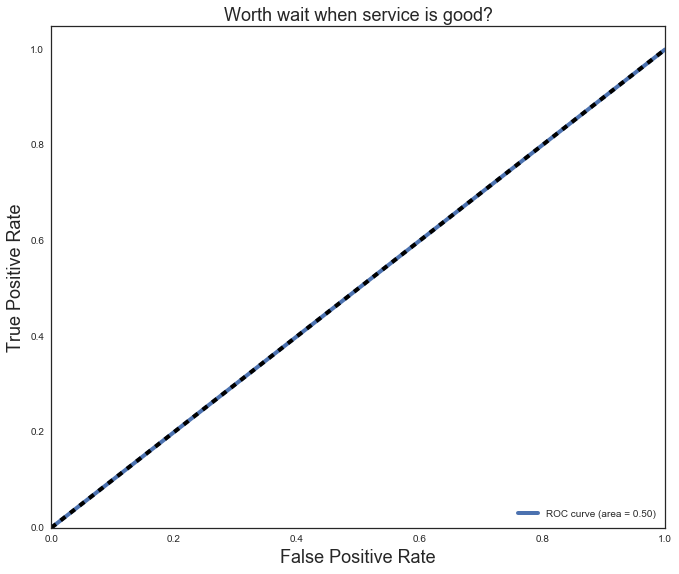

In [133]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, np.ravel(target), train_size=0.7, stratify=np.ravel(target))
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression(penalty='l1', C=1.0002302850208247, fit_intercept=True)
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('%s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X, y, title='Worth wait when service is good?')

In [134]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

search_parameters = {
    'penalty': ['l1','l2'],
    'fit_intercept': [True,False],
    'C': np.logspace(1e-4,2,100)
}

logreg = LogisticRegression()

estimator = GridSearchCV(logreg, search_parameters, cv=5)

results = estimator.fit(X1, np.ravel(y1))

print 'score: ', results.best_score_
print '\n params: ', results.best_params_
print '\n estimator: ', results.best_estimator_

score:  0.999466950959

 params:  {'penalty': 'l1', 'C': 1.0002302850208247, 'fit_intercept': True}

 estimator:  LogisticRegression(C=1.0002302850208247, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


trainX shape:  (2626, 37) 
testX shape: (1126, 37)
trainY shape:  (2626,) 
testY shape: (1126,)
Model Score:  0.999111900533


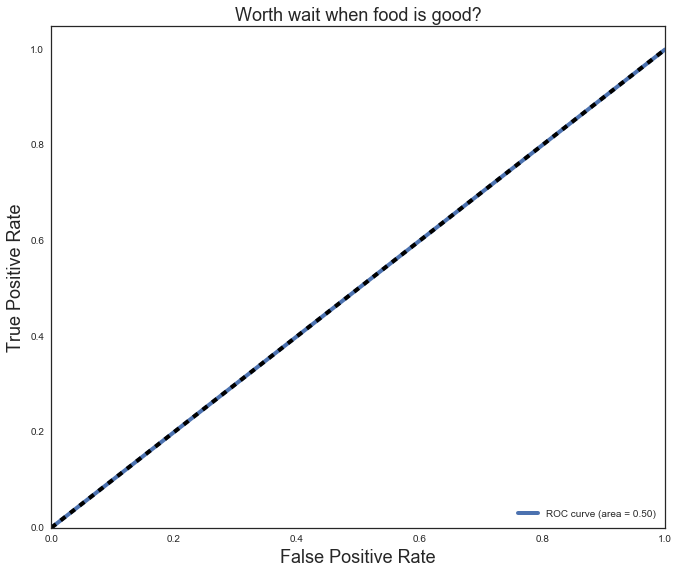

In [135]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, np.ravel(target), train_size=0.7, stratify=np.ravel(target))
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression(penalty='l1', C=1.0002302850208247, fit_intercept=True)
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('%s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X1, y1, title='Worth wait when food is good?')

# Conclusion

My original hypothesis, which I thought was very interesting, was "Does service and food have a correlation on whether or not a restaurant is worth the wait?" I also thought about targeting number of stars, but I did not think it was as interesting since there must be some sort of correlation between number of stars and how the rating works. Interestingly enough, worth wait does not have any affect on service or food. People are willing to wait, regardless if the service was good or bad. Both kNN and Logistic Regression results are relatively the same.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


In [136]:
df_users = pd.read_csv('/Users/edwardlee/Desktop/DSI/DSI-SF-2/datasets/yelp_arizona_data/users_small_parsed.csv')

In [137]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144206 entries, 0 to 144205
Data columns (total 21 columns):
yelping_since          144206 non-null object
compliments.plain      47034 non-null float64
review_count           144206 non-null int64
compliments.cute       13133 non-null float64
compliments.writer     33222 non-null float64
fans                   144206 non-null int64
compliments.note       39872 non-null float64
compliments.hot        31748 non-null float64
compliments.cool       41069 non-null float64
compliments.profile    12368 non-null float64
average_stars          144206 non-null float64
compliments.more       25066 non-null float64
elite                  144206 non-null object
name                   144206 non-null object
user_id                144206 non-null object
votes.cool             144206 non-null int64
compliments.list       7180 non-null float64
votes.funny            144206 non-null int64
compliments.photos     18759 non-null float64
compliments.funny  

In [138]:
df_users.head().T

,0,1,2,3,4
yelping_since,2004-10,2004-10,2004-10,2004-10,2004-10
compliments.plain,959,89,2,5,104
review_count,1274,442,66,101,983
compliments.cute,206,23,2,1,82
compliments.writer,327,24,2,3,17
fans,1179,100,4,7,78
compliments.note,611,83,1,3,85
compliments.hot,1094,101,1,5,265
compliments.cool,1642,145,1,4,212
compliments.profile,116,9,NaN,1,9


In [139]:
def elite_user(x):
    if '[]' in x:
        return 0
    else:
        return 1

df_users['elite'] = df_users['elite'].apply(elite_user)

In [140]:
df_users.shape

(144206, 21)

In [141]:
# Removing name and user_id because they are all unique ids
df_users.drop(['name','user_id'], axis=1, inplace=True)

In [142]:
# Convert date time to days_since this month
df_users['yelping_since'] = pd.to_datetime(df_users['yelping_since'])
df_users['yelping_since'] = (pd.to_datetime('2016-08') - df_users['yelping_since']).astype('timedelta64[D]')

In [143]:
# Rename column as membership_days
df_users.rename(columns={'yelping_since':'membership_days'}, inplace=True)

In [144]:
# Edited . and replaced with _ for patsy
df_users.columns = [col.replace('.','_').lower() for col in df_users.columns]

In [148]:
# Create new variable without elite/target column
df_users_columns = [col for col in df_users.columns]
df_users_columns.remove('elite')

In [149]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144206 entries, 0 to 144205
Data columns (total 19 columns):
membership_days        144206 non-null float64
compliments_plain      47034 non-null float64
review_count           144206 non-null int64
compliments_cute       13133 non-null float64
compliments_writer     33222 non-null float64
fans                   144206 non-null int64
compliments_note       39872 non-null float64
compliments_hot        31748 non-null float64
compliments_cool       41069 non-null float64
compliments_profile    12368 non-null float64
average_stars          144206 non-null float64
compliments_more       25066 non-null float64
elite                  144206 non-null int64
votes_cool             144206 non-null int64
compliments_list       7180 non-null float64
votes_funny            144206 non-null int64
compliments_photos     18759 non-null float64
compliments_funny      30612 non-null float64
votes_useful           144206 non-null int64
dtypes: float64(13),

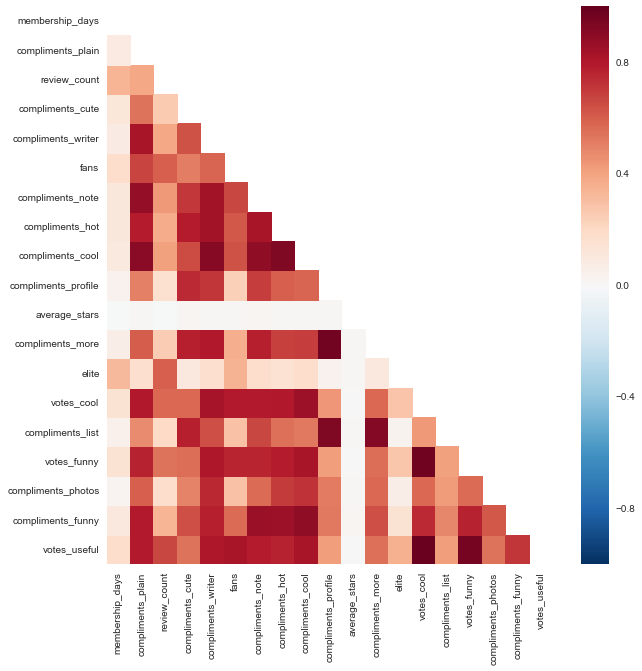

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df_users.corr(method='pearson')

%matplotlib inline

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(10,10))
ax = fig.gca()

ax = sns.heatmap(correlations, mask=mask)

In [151]:
import patsy

formula_expert = 'elite ~ ' + ' + '.join(df_users_columns) + ' - 1'
y_target, x_expert = patsy.dmatrices(formula_expert, df_users, return_type='dataframe')

In [152]:
from sklearn.cross_validation import train_test_split

trainx_expert, testx_expert, trainy_expert, testy_expert = train_test_split(x_expert, np.ravel(y_target), train_size=0.7, stratify=np.ravel(y_target))
print trainx_expert.shape, testx_expert.shape
print trainy_expert.shape, testy_expert.shape

(2856, 18) (1224, 18)
(2856,) (1224,)


In [153]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

search_expert_parameters = {
    'n_neighbors': np.arange(1,20,1),
    'weights': ['uniform','distance']
}

knn_expert = KNeighborsClassifier()
estimator_expert = GridSearchCV(knn_expert, search_expert_parameters, cv=7)
results = estimator_expert.fit(trainx_expert, trainy_expert)

print 'Score: ', results.best_score_
print 'Params: ', results.best_params_
print 'Estimator: ', results.best_estimator_

Score:  0.9418767507
Params:  {'n_neighbors': 5, 'weights': 'uniform'}
Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [154]:
from sklearn.neighbors import KNeighborsClassifier

knn_expert = KNeighborsClassifier(n_neighbors=9, weights='distance')
model = knn_expert.fit(trainx_expert, trainy_expert)
predict = model.predict(testx_expert)
print 'score: ', model.score(testx_expert, testy_expert)

score:  0.938725490196


In [163]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def knn_calc(predictors, target, title='Your Prediction'):
    
    ### Enter train_size of your choice
    trainX, testX, trainY, testY = train_test_split(predictors, np.ravel(target), train_size=0.7, stratify=np.ravel(target))
    print 'trainX and testX: ', trainX.shape, testX.shape
    print 'trainY and testY: ', trainY.shape, testY.shape
    
    ### Enter your GridSearch best params
    knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
    model = knn.fit(trainX, trainY)
    predict = model.predict(testX)
    print 'score: ', model.score(testX, testY)
    print 'baseline model: ', np.mean(np.ravel(target))
    
#     ### Plot
#     h = .02
#     x_min, x_max = predictors.ix[:, 0].min() - 1, predictors.ix[:, 0].max() + 1
#     y_min, y_max = predictors.ix[:, 1].min() - 1, predictors.ix[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.figure()
#     plt.pcolormesh(xx, yy, Z)

    # Plot also the training points
#     plt.scatter(predict, testY)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title('%s' %title, fontsize=18)
    
knn_calc(x_expert, y_target, title='KNN')

trainX and testX:  (2856, 18) (1224, 18)
trainY and testY:  (2856,) (1224,)
score:  0.938725490196
baseline model:  0.936764705882


In [164]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

search_parameters = {
    'penalty': ['l1','l2'],
    'fit_intercept': [True,False],
    'C': np.logspace(1e-4,2,100)
}

logreg = LogisticRegression()

estimator = GridSearchCV(logreg, search_parameters, cv=5)

results = estimator.fit(x_expert, np.ravel(y_target))

print 'score: ', results.best_score_
print '\n params: ', results.best_params_
print '\n estimator: ', results.best_estimator_

score:  0.934803921569

 params:  {'penalty': 'l2', 'C': 10.723869371301134, 'fit_intercept': True}

 estimator:  LogisticRegression(C=10.723869371301134, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


trainX shape:  (2856, 18) 
testX shape: (1224, 18)
trainY shape:  (2856,) 
testY shape: (1224,)
Model Score:  0.933823529412


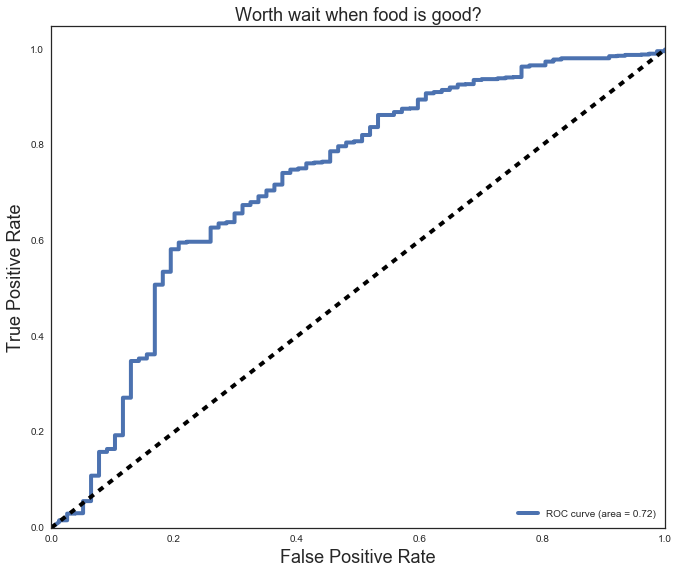

In [166]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, np.ravel(target), train_size=0.7, stratify=np.ravel(target))
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression(penalty='l2', C=10.723869371301134, fit_intercept=True)
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('%s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(x_expert, y_target, title='Worth wait when food is good?')

In [168]:
### Test-Train split 70-30
trainX, testX, trainY, testY = train_test_split(x_expert, np.ravel(y_target), train_size=0.7, stratify=np.ravel(y_target))
print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape

### Setup LogisticRegression modeling
# Create LogisticRegression function cross validated 5 times
logreg = LogisticRegression(penalty='l2', C=10.723869371301134, fit_intercept=True)
# Fit the data points into the LogisticRegression model
model = logreg.fit(trainX, trainY)
# Predict Probability
probabilities = model.predict_proba(testX)
# Score the model
score = model.score(testX, testY)
print 'Model Score: ', score

trainX shape:  (2856, 18) 
testX shape: (1224, 18)
trainY shape:  (2856,) 
testY shape: (1224,)
Model Score:  0.937091503268


In [169]:
coef_df = pd.DataFrame(zip(x_expert, model.coef_[0]))
coef_df

,0,1
0,membership_days,0.000287
1,compliments_plain,-0.000569
2,review_count,-0.000382
3,compliments_cute,0.001509
4,compliments_writer,0.012715
5,fans,0.011510
6,compliments_note,-0.000655
7,compliments_hot,-0.001228
8,compliments_cool,0.002272
9,compliments_profile,-0.008690


In [171]:
# Review count had the highest correlation in my previous heatmap
import patsy

formula = 'elite ~ review_count + - 1'
y, X = patsy.dmatrices(formula, df_users, return_type='dataframe')

trainX shape:  (100944, 2) 
testX shape: (43262, 2)
trainY shape:  (100944,) 
testY shape: (43262,)
Model Score:  0.936988581203


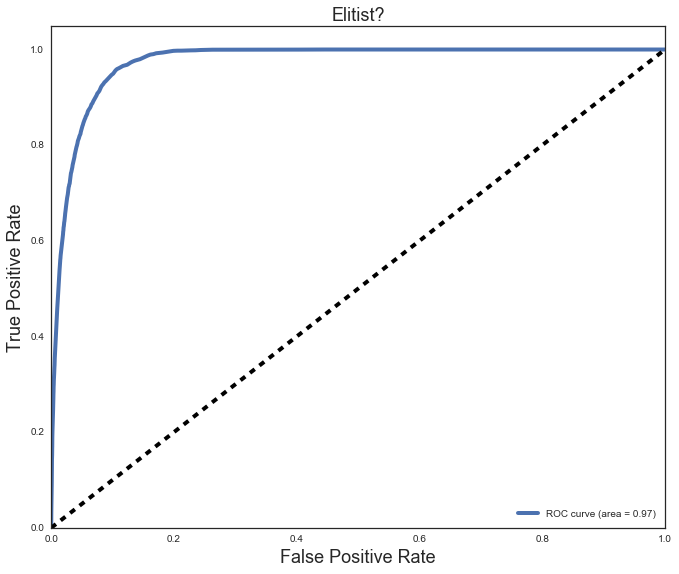

In [173]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, np.ravel(target), train_size=0.7, stratify=np.ravel(target))
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression(penalty='l2', C=10.723869371301134, fit_intercept=True)
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('%s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X, y, title='Elitist?')

In [174]:
# Review count had the highest correlation in my previous heatmap
import patsy

formula = 'elite ~ review_count + fans + membership_days - 1'
y, X = patsy.dmatrices(formula, df_users, return_type='dataframe')

trainX shape:  (100944, 3) 
testX shape: (43262, 3)
trainY shape:  (100944,) 
testY shape: (43262,)
Model Score:  0.943090934307


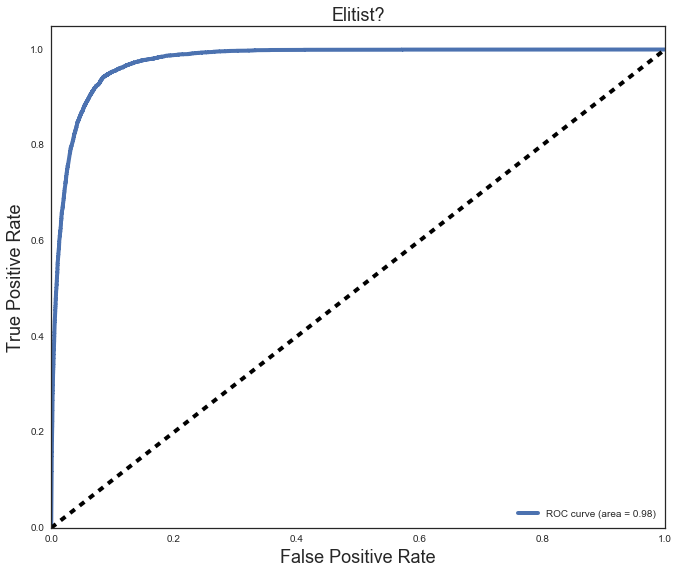

In [175]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, np.ravel(target), train_size=0.7, stratify=np.ravel(target))
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression(penalty='l2', C=10.723869371301134, fit_intercept=True)
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('%s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X, y, title='Elitist?')

# Conclusion

After multiple correlation comparisons, elite Yelp! users have a higher review count, fans and have been a member at Yelp! longer. With a 0.98 ROC curve, there is no doubt within my mind that those 3 predictors are the variables that differ between an average user and an elite user. It is interesting that review count, itself, has a ROC curve of 0.97, which means, reviews with higher amounts of reviews are generally considered more reliable, and thus, becoming an elite user.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?